In [2]:
%pylab inline
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


In [3]:
import plot_is 

In [4]:
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
import yt
from yt.mods import *

In [5]:
cd /project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin


In the previous notebook, I ran levelmin = levelmax=7 (unigrid)

Now I change this to : 
level = 5~9

In [6]:
yt.funcs.mylog.setLevel(50)

In [7]:
rho_c = 0.02806
scale_d = 3.92e-18

### Trying a very large $\xi_{max}=7$, yielding density constrast of ~17

The reason why its not changing is that the sphere profile is set as like 0.19 which is no good 

In [43]:
d_ratio[np.where(d_ratio<20)[0]][-1]

16.043885059495036

The AMR runs takes significanlty longer probably because resolution is very high 


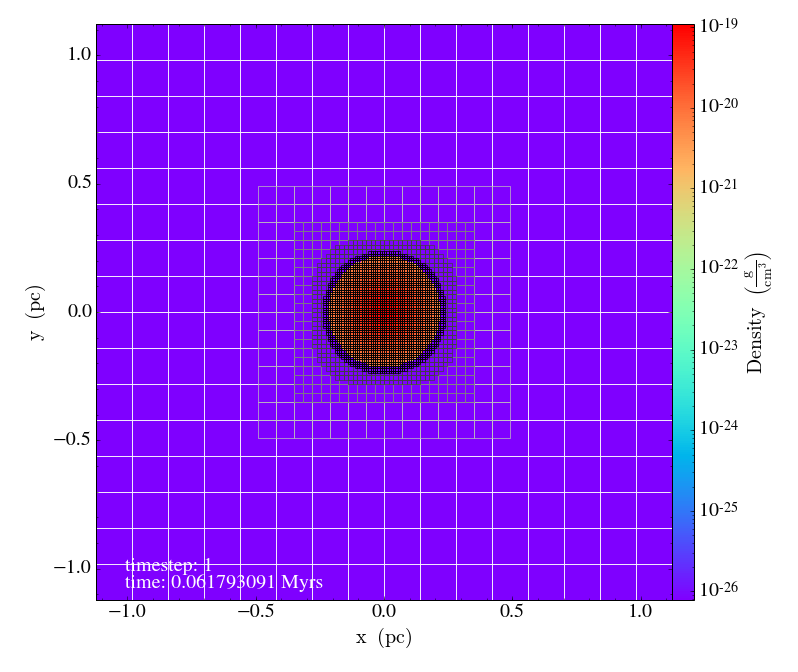

In [14]:
plot_is.plot_time_slice("density",1, grid=True)


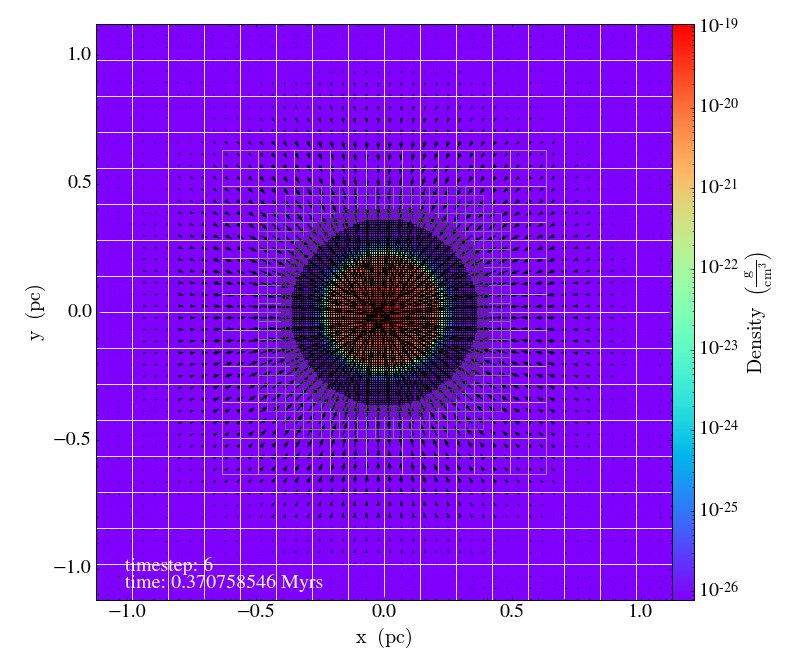

In [15]:
plot_is.plot_time_slice("density",6,grid=True)

(0, 30)

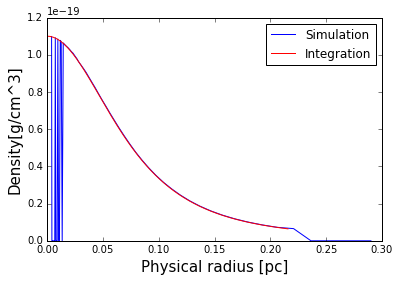

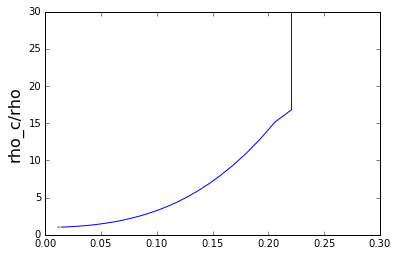

In [18]:
timestep =1
pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
plt.figure()
sp = pf.sphere(pf.domain_center, (0.30,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 7
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)


plt.figure()
d_ratio = rho_c/rp["density"].in_units("g/cm**3").value*scale_d
plt.plot(rp.x.value*3.24077929e-19,d_ratio)
plt.ylabel("rho_c/rho",fontsize=16)
plt.xlim(0,0.3)
plt.ylim(0,30)

In [19]:
d_ratio[np.where(d_ratio<20)[0]][-1]

16.804829692400094

The density contrast is 16.8, which is larger than the non-AMR case, since the radius is more finely lined up 


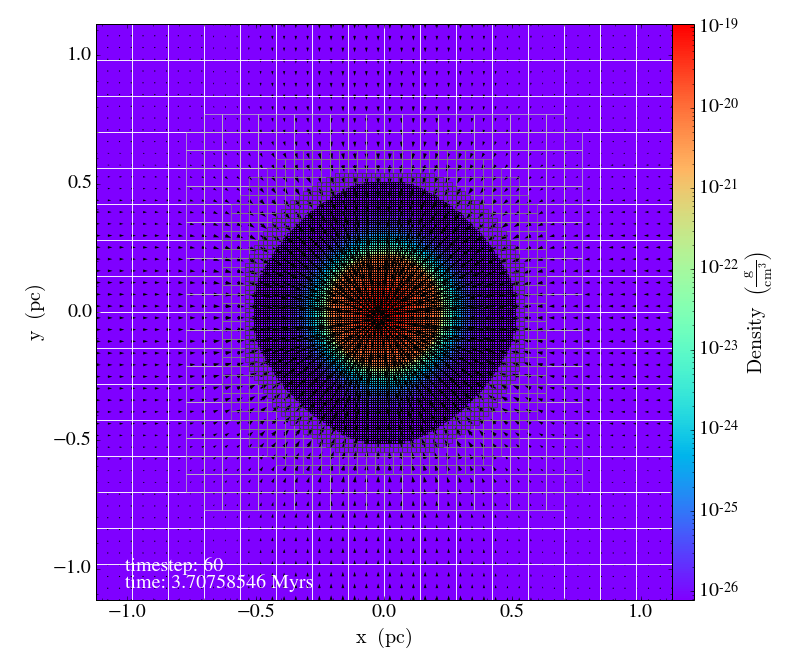

In [22]:
plot_is.plot_time_slice("density",60,grid=True)

The velocity vectors are so symmetrical compared to no AMR case!

Make sure fix the color bar this is patch on plot_is.py now 


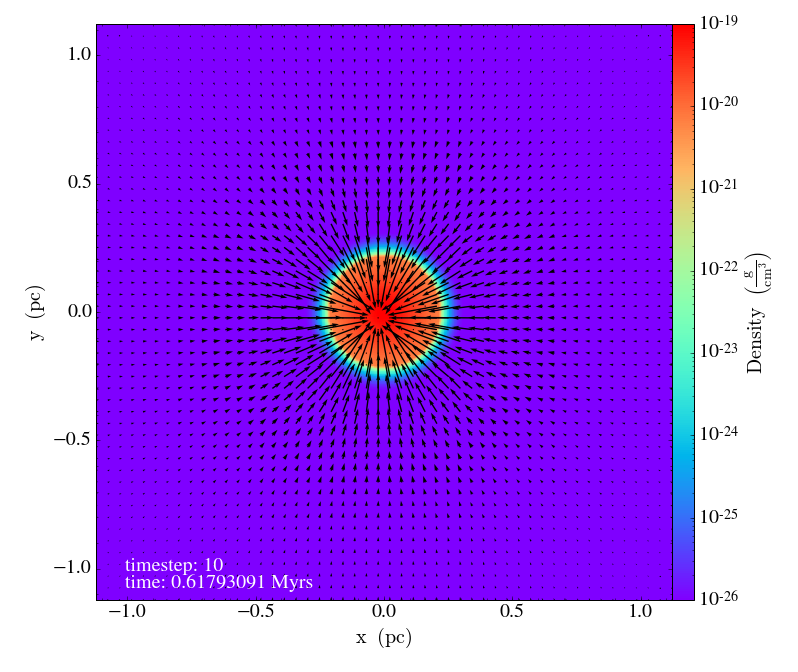


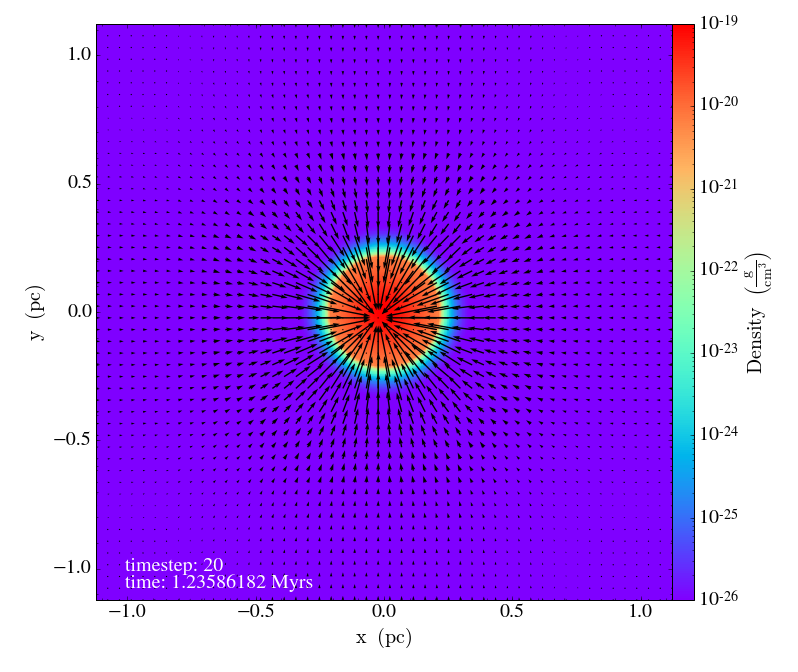


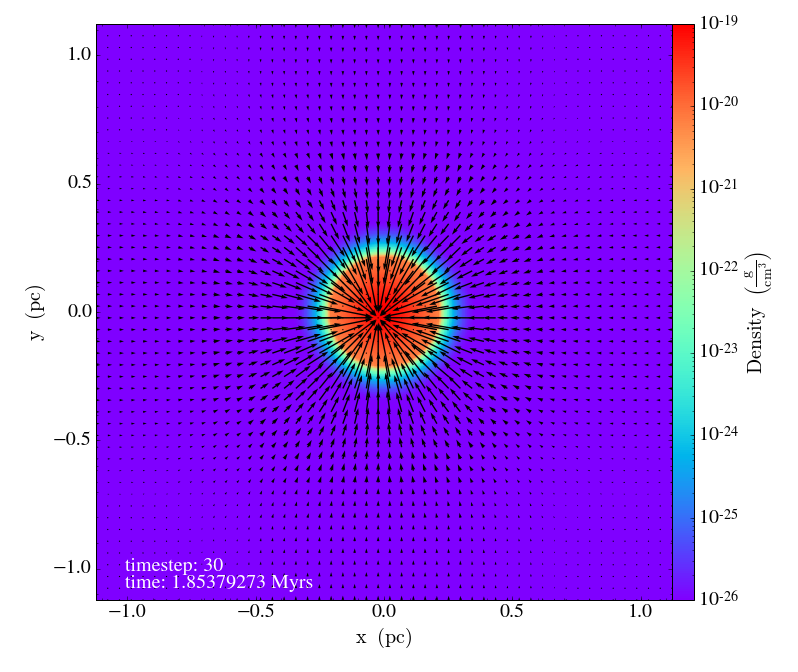


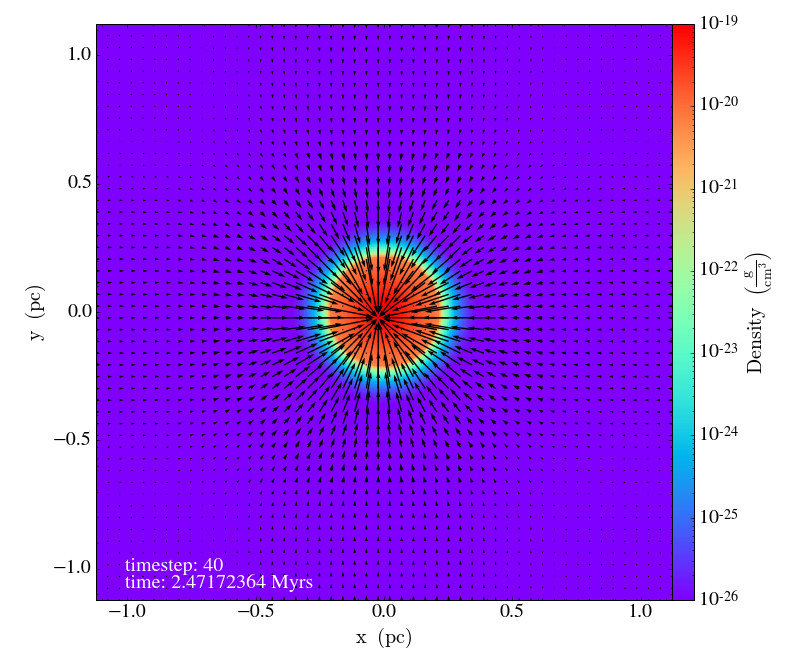


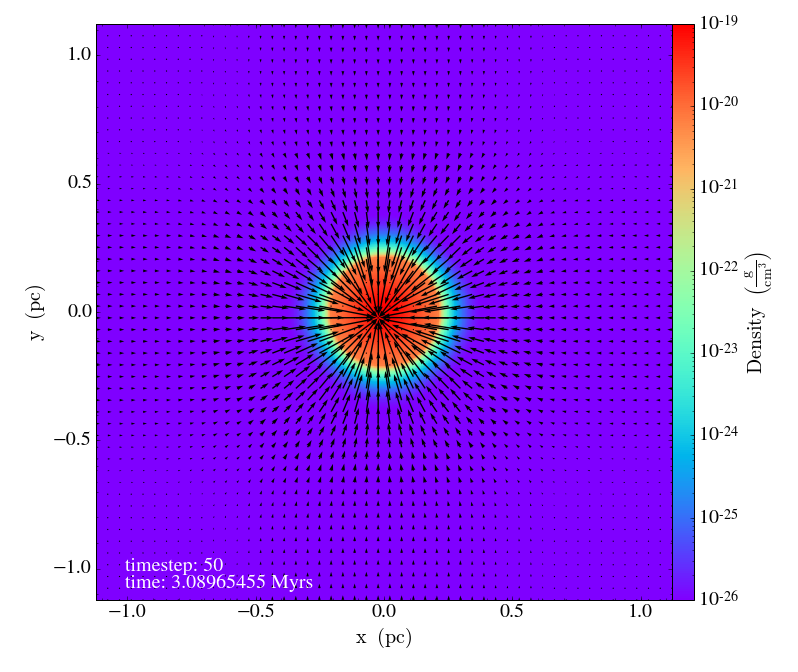


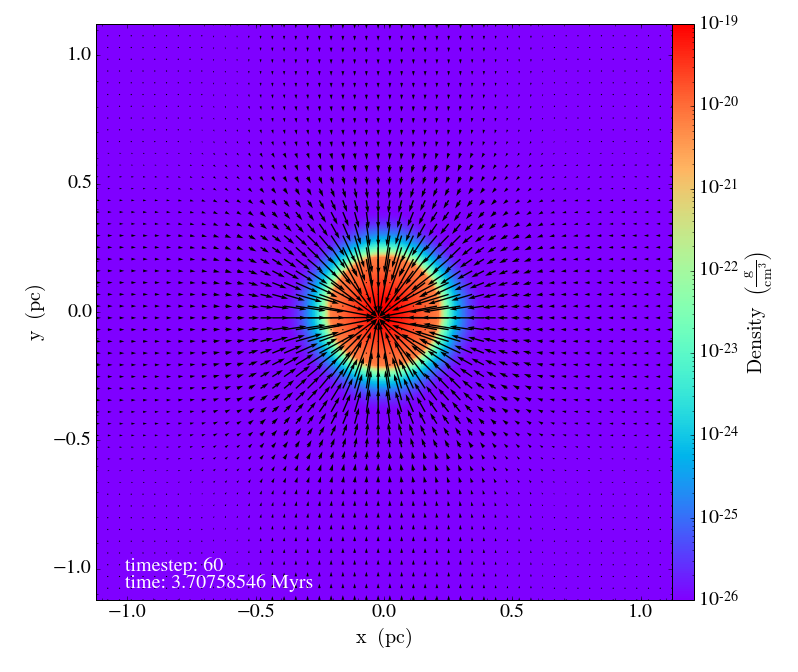


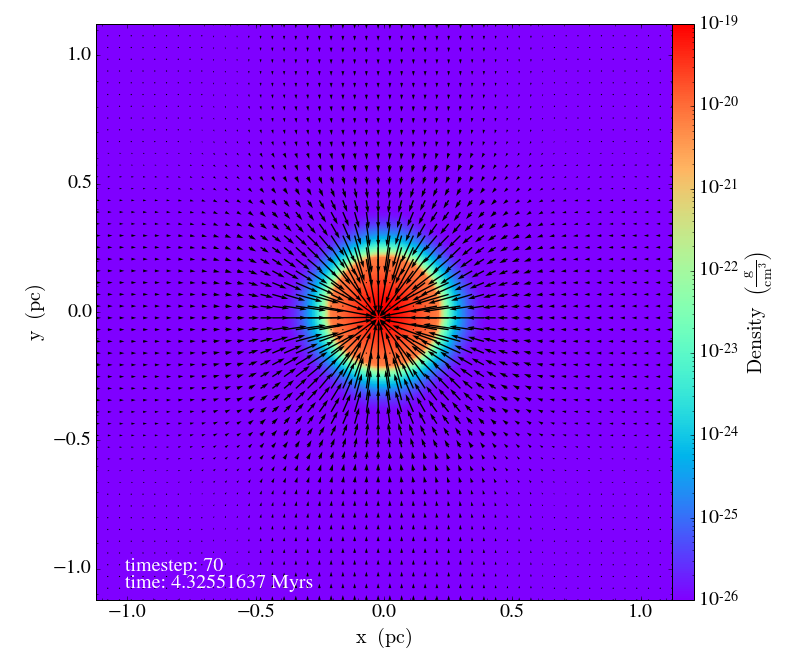

In [19]:
for i in np.arange(1,80):
    if i%10==0:
        plot_time_slice("density",i)


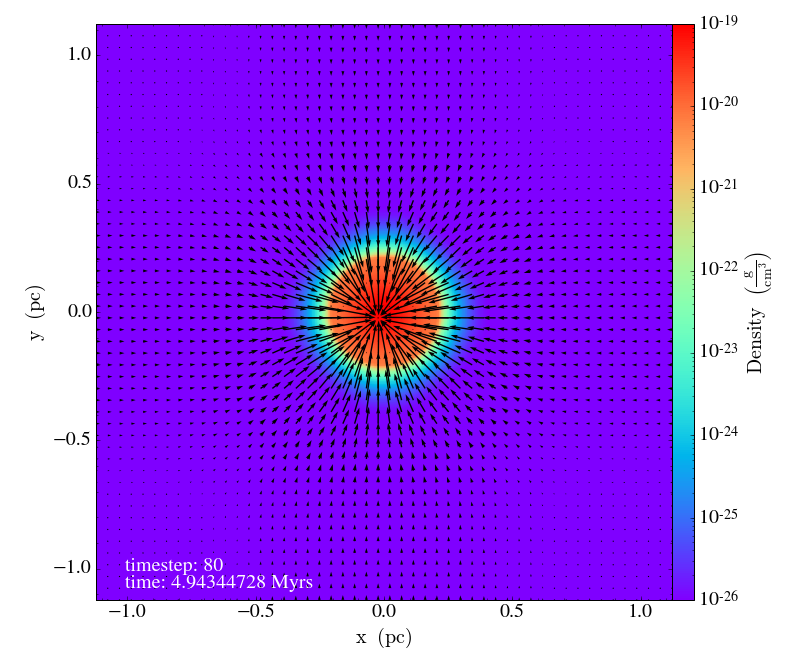


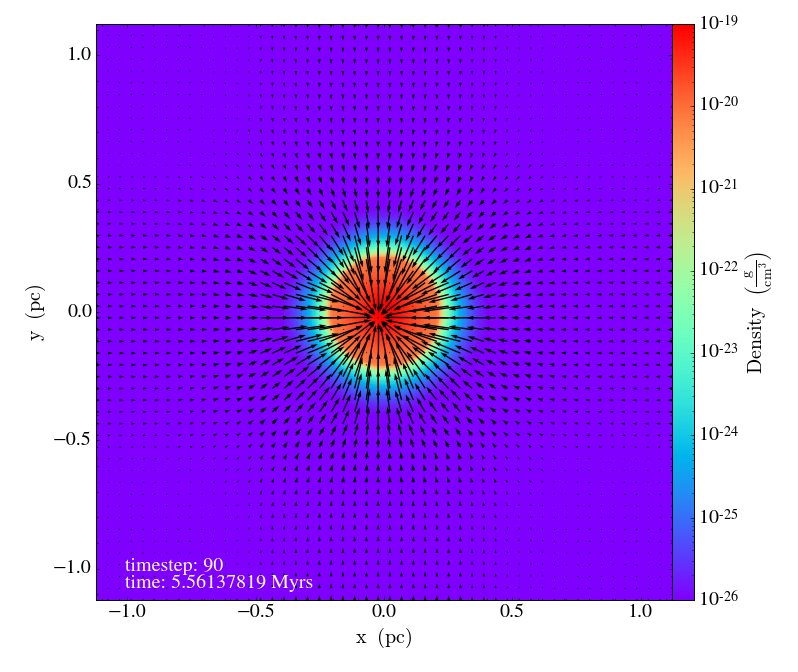


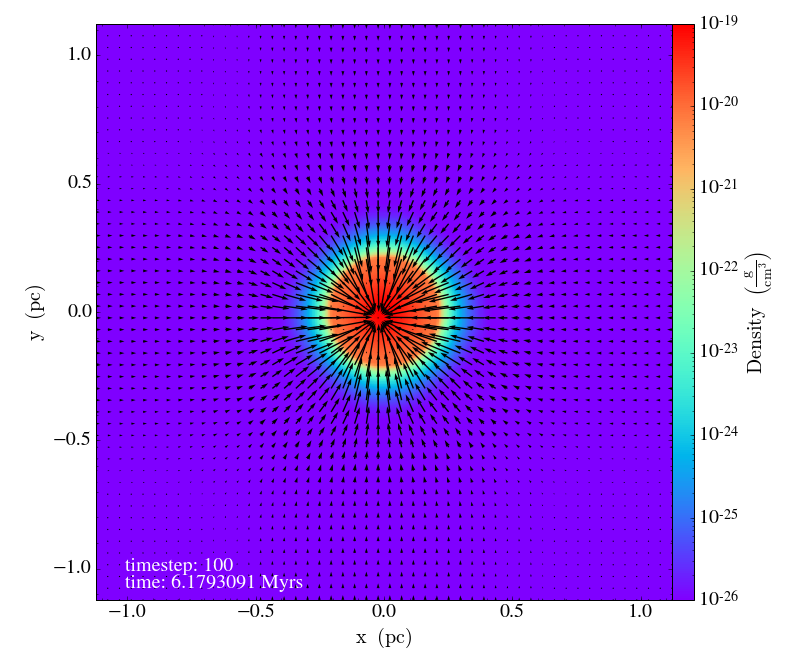

In [18]:
for i in np.arange(80,110):
    if i%10==0:
        plot_time_slice("density",i)


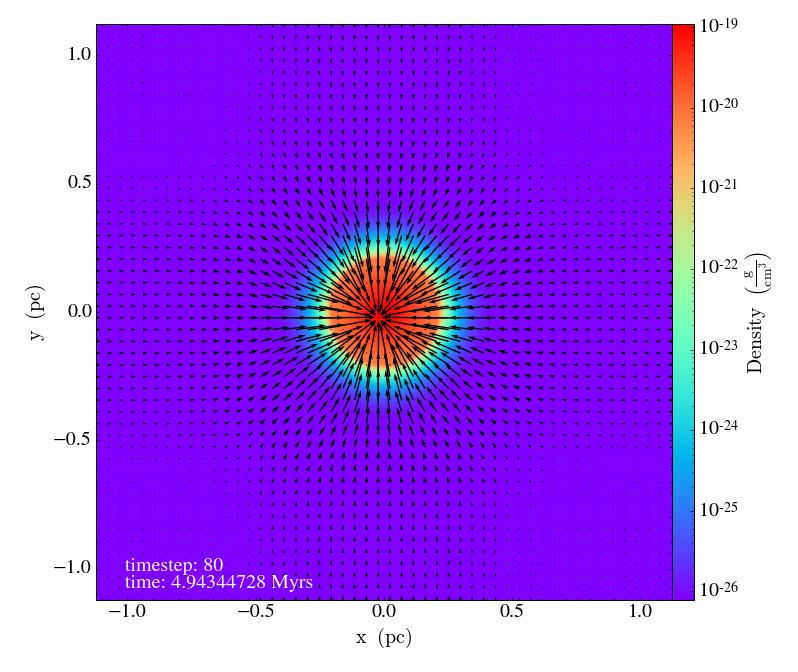


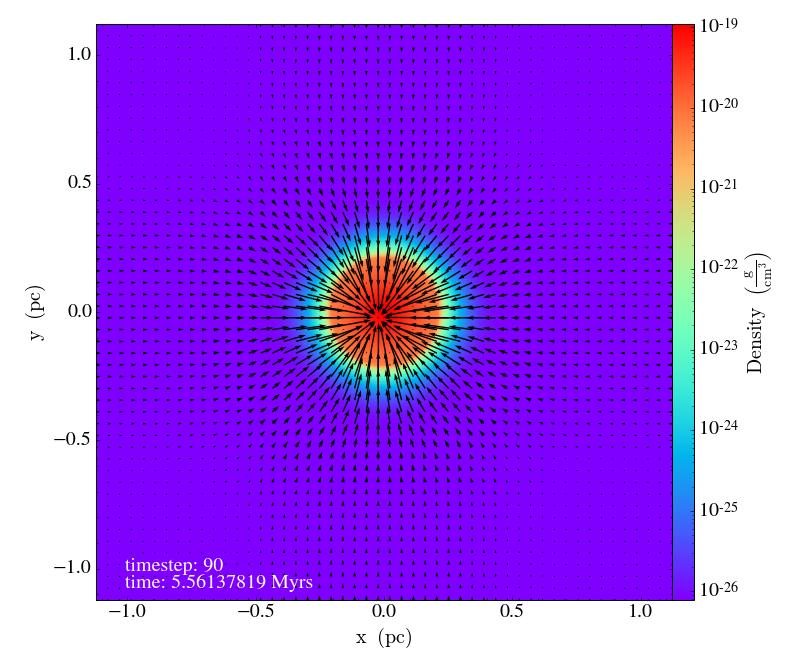


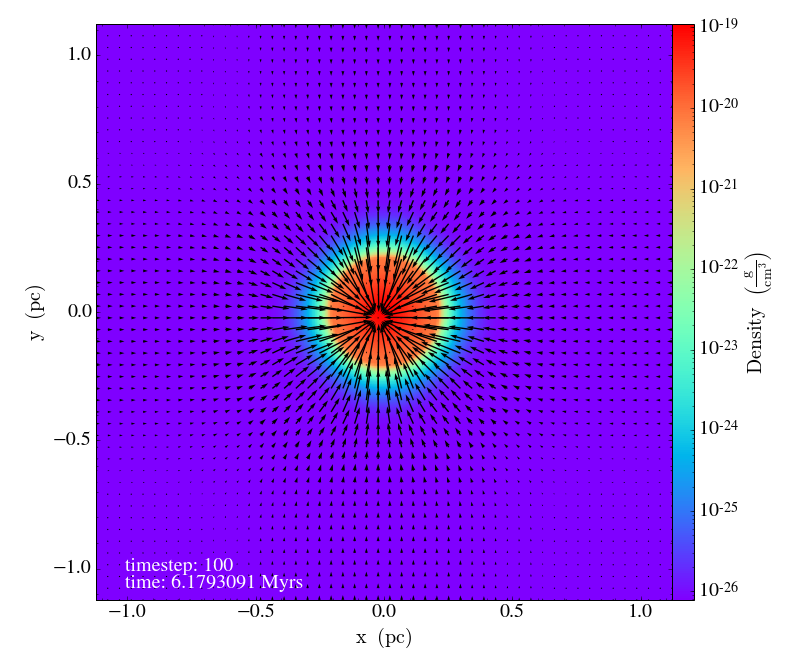

In [9]:
for i in np.arange(80,110):
    if i%10==0:
        plot_is.plot_time_slice("density",i)

In [ ]:
t_scale = 1.9548156e+12